#### Aim: To locally adapt  the ozone concentration forecasts of the MOCAGE chemistry-transport model of MétéoFrance for the next 24 hours. This statistical post-processing called statistical adaptation (SA) aims to. The objective of this statistical post-processing called statistical adaptation (SA) is to debias the MOCAGE model and reduce the amplitude of its errors.


The strategy adopted in this TP is to estimate a single linear Gaussian model 
regressing observed ozone (predictand = variable O3o) at five sites in France (Aix, Cadarache-StPaul, Plan d'Aups, Rambouillet and Munchhausen in Alsace
(Aix, Cadarache-StPaul, Plan d'Aups, Rambouillet and Munchhausen in Alsace; see map in appendix) by exploiting the 7 predictive 
map in the appendix) by exploiting the following 7 potential predictors: 
- O3p: [O3] predicted by MOCAGE at the time considered (μg/m3)
- TEMPE: Temperature predicted by MOCAGE for the time frame considered (°C)
- RMH2O: Mixing ratio predicted by MOCAGE for the time frame in question (g/kg)
- FF: Wind force predicted by MOCAGE for the time frame in question (m/s)
- NO2: [NO2] predicted by MOCAGE for the time frame in question (μg/m3)
- DD: Day of the week (a factor with two modalities coded S for working days,
- F for weekends and public holidays)
- STATION: Name of the station, five-way factor coded Aix, Cad, Pla, Ram and Als.


The DataTP.txt file contains measurements of the 
O3o concentration measurements made during the summers of 2002 to 2005 and the associated forecasts 
from the MOCAGE model.


## Data loading

In [8]:
data=read.table(file="DataTP.txt",header=TRUE)

In [9]:
head(data)

DATE,JJ,O3o,O3p,TEMPE,RMH2O,NO2,STATION,FF
20020525,F,91,93.2,21.5,0.00847,1.602,Aix,9.5000
20020526,F,100,104.6,20.2,0.00881,2.121,Aix,8.0100
20020527,S,82,103.6,17.4,0.00951,1.657,Aix,9.3771
20020528,S,94,94.8,18.8,0.00855,2.350,Aix,9.4578
20020529,S,107,99.0,23.7,0.00731,1.653,Aix,7.8791
20020530,S,150,114.3,23.6,0.01182,5.316,Aix,6.3127


In [10]:
names(data)
summary(data)
dim(data)

[1] "DATE"    "JJ"      "O3o"     "O3p"     "TEMPE"   "RMH2O"   "NO2"    
[8] "STATION" "FF"

      DATE          JJ           O3o             O3p            TEMPE      
 Min.   :20020525   F:317   Min.   : 19.0   Min.   : 46.4   Min.   :10.40  
 1st Qu.:20020721   S:724   1st Qu.: 87.0   1st Qu.: 97.5   1st Qu.:20.20  
 Median :20050529           Median :109.0   Median :125.6   Median :23.80  
 Mean   :20040083           Mean   :115.4   Mean   :127.2   Mean   :23.88  
 3rd Qu.:20050726           3rd Qu.:135.0   3rd Qu.:153.6   3rd Qu.:27.60  
 Max.   :20050929           Max.   :319.0   Max.   :284.7   Max.   :38.00  
     RMH2O              NO2         STATION         FF         
 Min.   :0.00285   Min.   : 0.258   Aix:199   Min.   : 0.1414  
 1st Qu.:0.00763   1st Qu.: 1.248   Als:222   1st Qu.: 3.9623  
 Median :0.00985   Median : 2.109   Cad:202   Median : 5.5973  
 Mean   :0.01025   Mean   : 3.505   Pla:208   Mean   : 5.9072  
 3rd Qu.:0.01244   3rd Qu.: 4.062   Ram:210   3rd Qu.: 7.1063  
 Max.   :0.02753   Max.   :44.396             Max.   :19.8910  

[1] 1041    9

## Preliminary study and simple regression

In [11]:
aix=subset(data,data$STATION=="Aix")

In [12]:
head(aix)

DATE,JJ,O3o,O3p,TEMPE,RMH2O,NO2,STATION,FF
20020525,F,91,93.2,21.5,0.00847,1.602,Aix,9.5000
20020526,F,100,104.6,20.2,0.00881,2.121,Aix,8.0100
20020527,S,82,103.6,17.4,0.00951,1.657,Aix,9.3771
20020528,S,94,94.8,18.8,0.00855,2.350,Aix,9.4578
20020529,S,107,99.0,23.7,0.00731,1.653,Aix,7.8791
20020530,S,150,114.3,23.6,0.01182,5.316,Aix,6.3127


      DATE          JJ           O3o             O3p            TEMPE      
 Min.   :20020525   F: 59   Min.   : 26.0   Min.   : 66.9   Min.   :14.30  
 1st Qu.:20020716   S:140   1st Qu.: 93.0   1st Qu.:110.7   1st Qu.:23.30  
 Median :20050527           Median :112.0   Median :132.1   Median :26.10  
 Mean   :20039636           Mean   :119.5   Mean   :135.4   Mean   :25.77  
 3rd Qu.:20050724           3rd Qu.:138.5   3rd Qu.:154.5   3rd Qu.:28.60  
 Max.   :20050925           Max.   :255.0   Max.   :253.4   Max.   :34.10  
     RMH2O               NO2         STATION         FF         
 Min.   :0.003640   Min.   : 1.045   Aix:199   Min.   : 0.9434  
 1st Qu.:0.007240   1st Qu.: 3.126   Als:  0   1st Qu.: 5.5938  
 Median :0.009560   Median : 4.836   Cad:  0   Median : 6.3127  
 Mean   :0.009962   Mean   : 6.732   Pla:  0   Mean   : 6.7949  
 3rd Qu.:0.012055   3rd Qu.: 8.609   Ram:  0   3rd Qu.: 7.3730  
 Max.   :0.024860   Max.   :31.114             Max.   :14.2948  

[1] 36.25051

[1] 34.19974

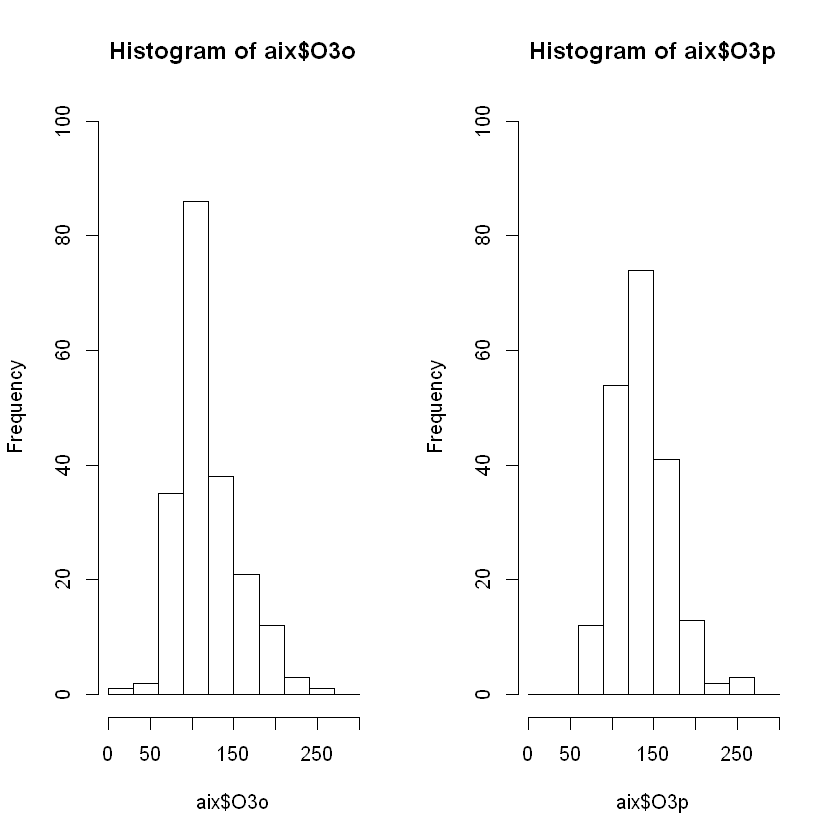

In [13]:
summary(aix)
sd(aix$O3o) #standard deviation
sd(aix$O3p)
par(mfrow=c(1,2))
hist(aix$O3o,breaks=seq(0,300,30),ylim=c(0,100))
hist(aix$O3p,breaks=seq(0,300,30),ylim=c(0,100))

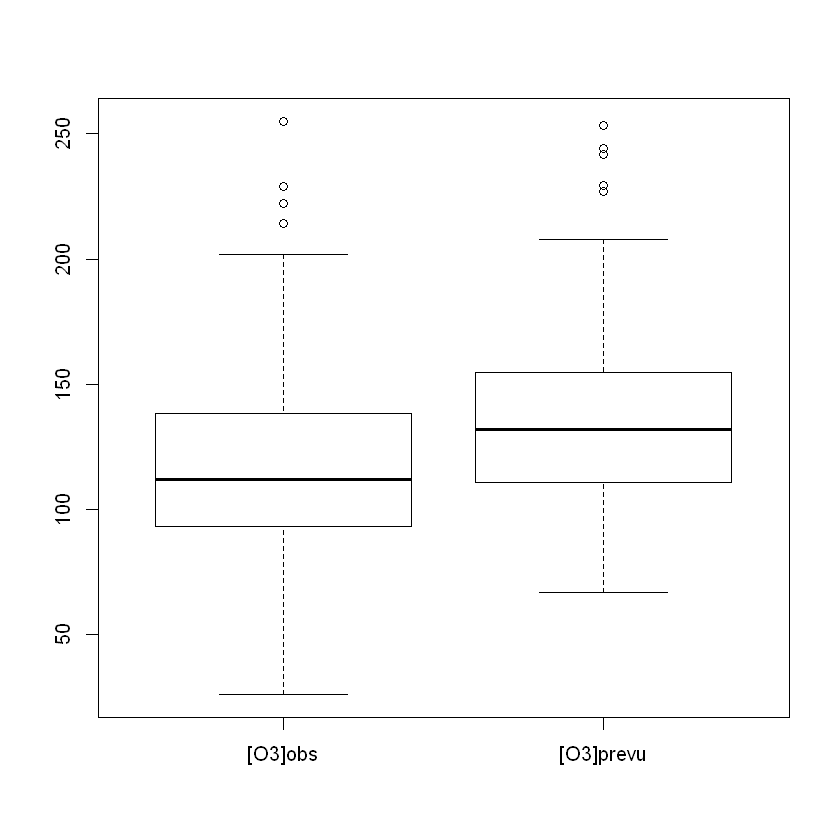

In [14]:
boxplot(aix$O3o,aix$O3p,names=c("[O3]obs","[O3]prevu"))

In [15]:
var.test(aix$O3o,aix$O3p)



	F test to compare two variances

data:  aix$O3o and aix$O3p
F = 1.1235, num df = 198, denom df = 198, p-value = 0.4133
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.8496676 1.4856490
sample estimates:
ratio of variances 
          1.123525 


### --> variances can be considered equal

In [18]:
t.test(aix$O3o,aix$O3p,var.equal=T)


	Two Sample t-test

data:  aix$O3o and aix$O3p
t = -4.5013, df = 396, p-value = 8.892e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -22.84800  -8.95703
sample estimates:
mean of x mean of y 
 119.4975  135.4000 


### --> les moyennes sont significativement differentes --> biais positif de MOCAGE

In [19]:
cor(aix$O3o,aix$O3p)
cor.test(aix$O3o,aix$O3p)

[1] 0.4781333


	Pearson's product-moment correlation

data:  aix$O3o and aix$O3p
t = 7.6409, df = 197, p-value = 9.203e-13
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3631973 0.5787353
sample estimates:
      cor 
0.4781333 


### --> significant linear link


Call:
lm(formula = O3o ~ O3p, data = aix)

Residuals:
     Min       1Q   Median       3Q      Max 
-119.801  -20.070   -3.895   15.507  107.223 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 50.87618    9.26142   5.493 1.21e-07 ***
O3p          0.50680    0.06633   7.641 9.20e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 31.92 on 197 degrees of freedom
Multiple R-squared:  0.2286,	Adjusted R-squared:  0.2247 
F-statistic: 58.38 on 1 and 197 DF,  p-value: 9.203e-13


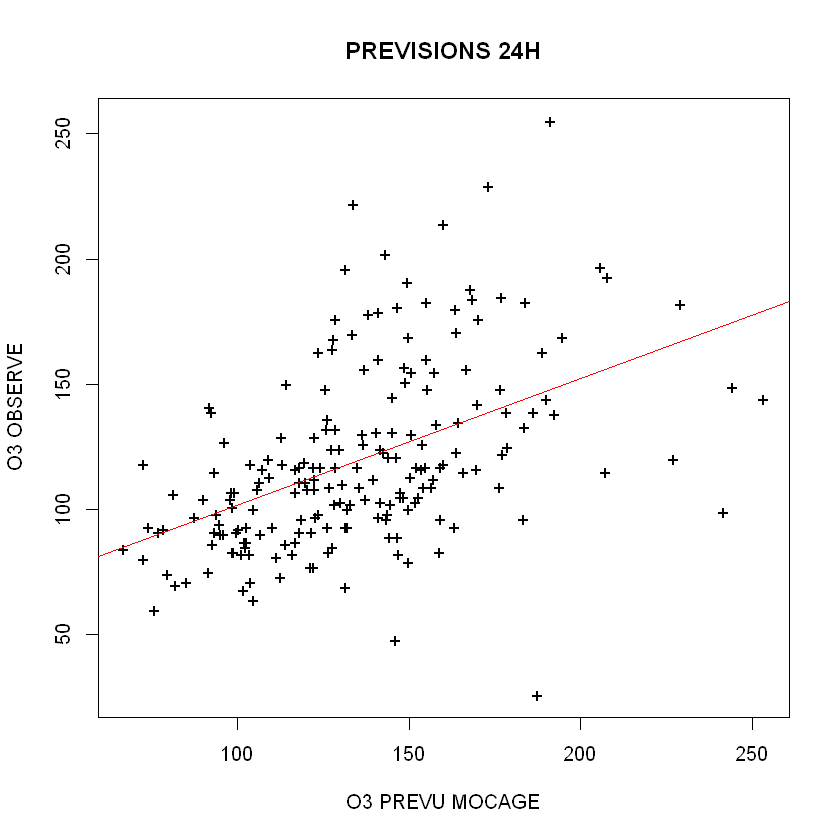

In [23]:
plot(aix$O3p,aix$O3o,xlab="O3 PREVU MOCAGE",ylab="O3 OBSERVE",main="PREVISIONS 24H",pch='+')
abline(regsimple,col="red")
regsimple=lm(O3o~O3p,data=aix)
summary(regsimple)

 - the 2 parameters of the model are judged to be significantly different from 0
 - simple regression explains only 22.86% of the total variance of the predictand
 - by considering other predictors, the statistical model can certainly be improved

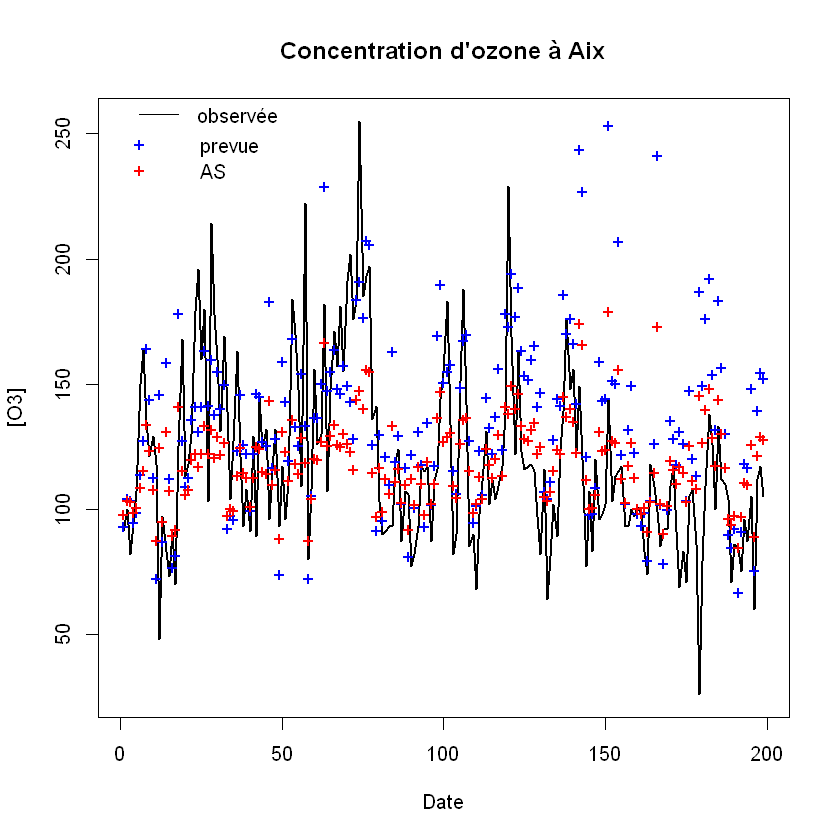

In [42]:
plot(aix$O3o,type ="l",lwd=2,main="Concentration d'ozone à Aix",xlab="Date",ylab="[O3]")
points(aix$O3p,col="blue",pch="+")
points(fitted(regsimple),col="red",pch="+")
legend(0,268,lty=1,col=c("black"),legend=c("observée"),bty="n")
legend(0,256,pch="+",col=c("blue","red"),legend=c("       prevue","       AS"),bty="n")

In [43]:
# the statistical treatment pulls the raw predictions towards the mean of the predictand and is unable to reach the extreme values
# the variability of the predictand is poorly reproduced, the regression needs to be enriched to reach a higher variability


## Multiple regression: continuous predictors

[1] 0.1085806

[1] 0.175344

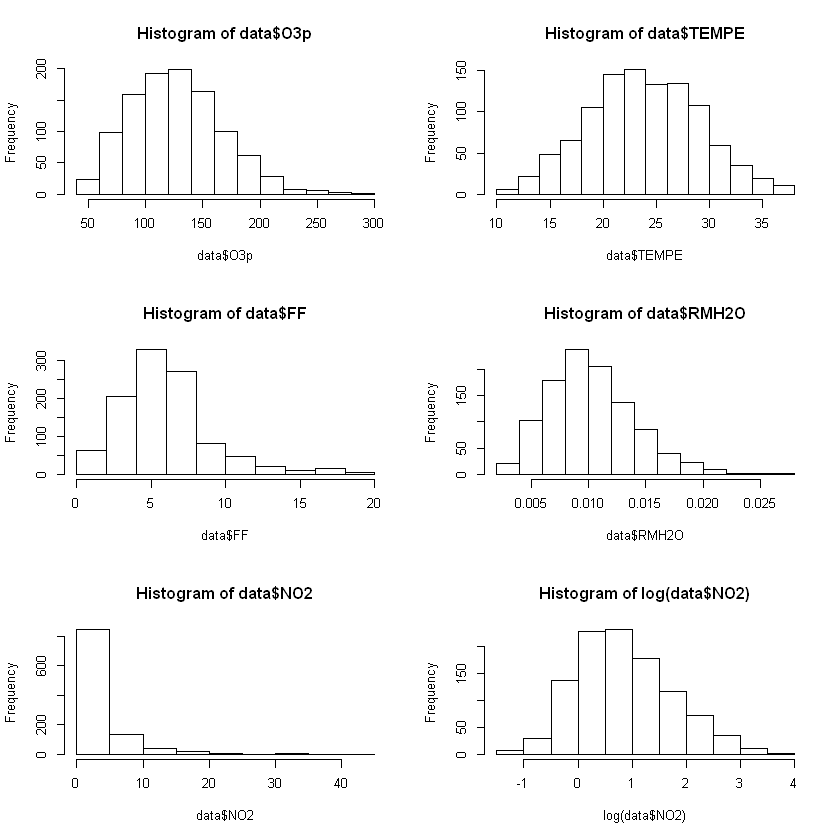

In [44]:
par(mfrow=c(3,2))
hist(data$O3p)
hist(data$TEMPE)
hist(data$FF)
hist(data$RMH2O)
hist(data$NO2)
hist(log(data$NO2))
cor(data$O3o,data$NO2)
cor(data$O3o,log(data$NO2))

 - The distribution of NO2 is very skewed, the use of the log function allows to obtain a profile more adapted to the Gaussian model
 the symmetry of the predictor distributions is not an assumption of the GLM but it allows to limit the occurrences and impacts of extreme values 
 which would be very influential in the estimation of the regression parameters. The predictor developed will also be better correlated with the predictand O3o.
 - The predictor developed will also be better correlated with the predictor of O3o -> we will therefore rather use the variable log(NO2) as a predictor in the future.

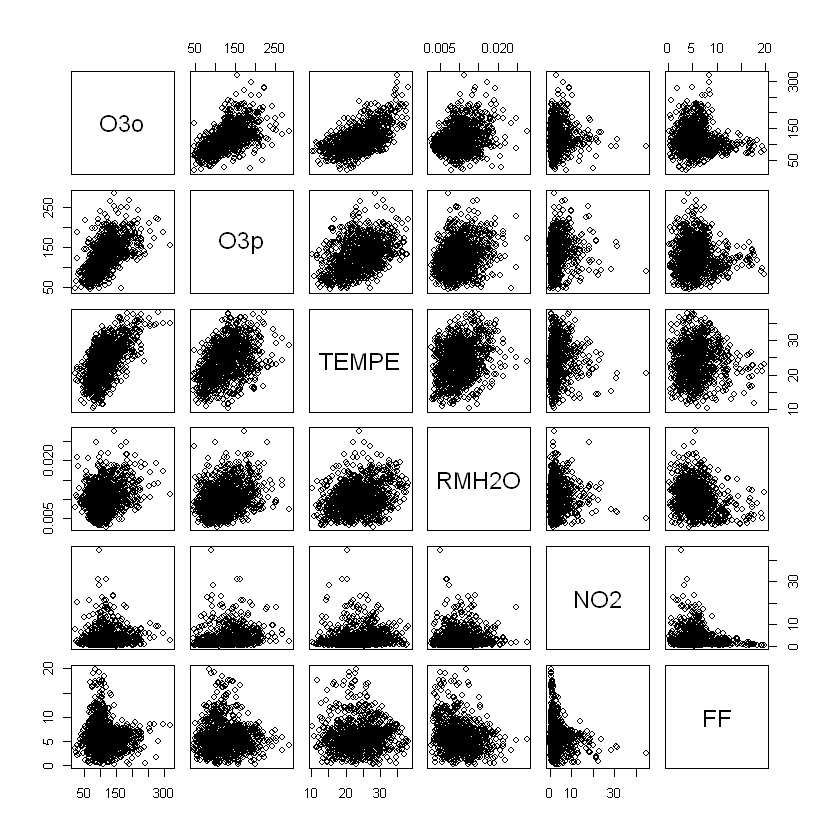

In [46]:
pairs(data[,c(-1,-2,-8)])

 - we try to identify on this graphical matrix the multicolinearity problems between predictors and the strong correlations between 
 the different variables and the predictand O3o
 - no significant collinearity problems between predictors here, the best correlated variables with O3o seem to be O3p and TEMPE which will constitute the best predictors 
 probably the best predictors


In [48]:
regmult=lm(O3o~O3p+TEMPE+RMH2O+log(NO2)+FF,data)
summary(regmult)


Call:
lm(formula = O3o ~ O3p + TEMPE + RMH2O + log(NO2) + FF, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-106.096  -18.814   -0.804   18.014  155.746 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -19.69561    5.03109  -3.915 9.64e-05 ***
O3p           0.41301    0.02586  15.969  < 2e-16 ***
TEMPE         3.36476    0.19091  17.625  < 2e-16 ***
RMH2O       678.86273  257.51488   2.636  0.00851 ** 
log(NO2)     -0.96743    1.09449  -0.884  0.37695    
FF           -0.66890    0.30556  -2.189  0.02881 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 28.62 on 1035 degrees of freedom
Multiple R-squared:  0.5151,	Adjusted R-squared:  0.5128 
F-statistic: 219.9 on 5 and 1035 DF,  p-value: < 2.2e-16


 - Student's t test analysis shows that the influence of NO2 is not significant
 the % of explained variance increases to 51.51%.


In [50]:
model.matrix(regmult)[1:10,]

(Intercept),O3p,TEMPE,RMH2O,log(NO2),FF
1,93.2,21.5,0.00847,0.4712528,9.5000
1,104.6,20.2,0.00881,0.7518877,8.0100
1,103.6,17.4,0.00951,0.5050087,9.3771
1,94.8,18.8,0.00855,0.8544153,9.4578
1,99.0,23.7,0.00731,0.5025918,7.8791
1,114.3,23.6,0.01182,1.6707211,6.3127
1,127.7,26.6,0.00937,1.0441561,4.8042
1,164.3,23.5,0.01087,2.7557604,4.8795
1,144.1,23.3,0.01168,2.1755469,5.1088
1,112.8,23.7,0.01091,2.9397438,5.4406


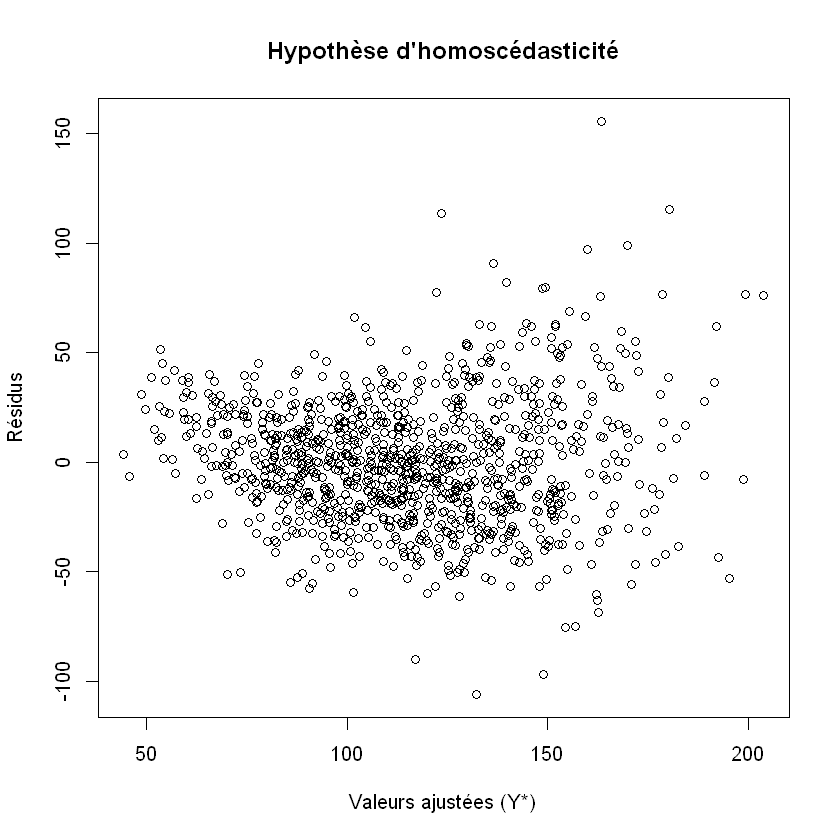

In [52]:
plot(fitted(regmult),residuals(regmult),main="Hypothèse d'homoscédasticité",xlab="Valeurs ajustées (Y*)",ylab="Résidus")
# -> legere heteroscedasticite, il y aurait mieux à faire qu'une regression lineaire : il faudrait transformer le predictand pour stabiliser la variance des erreurs

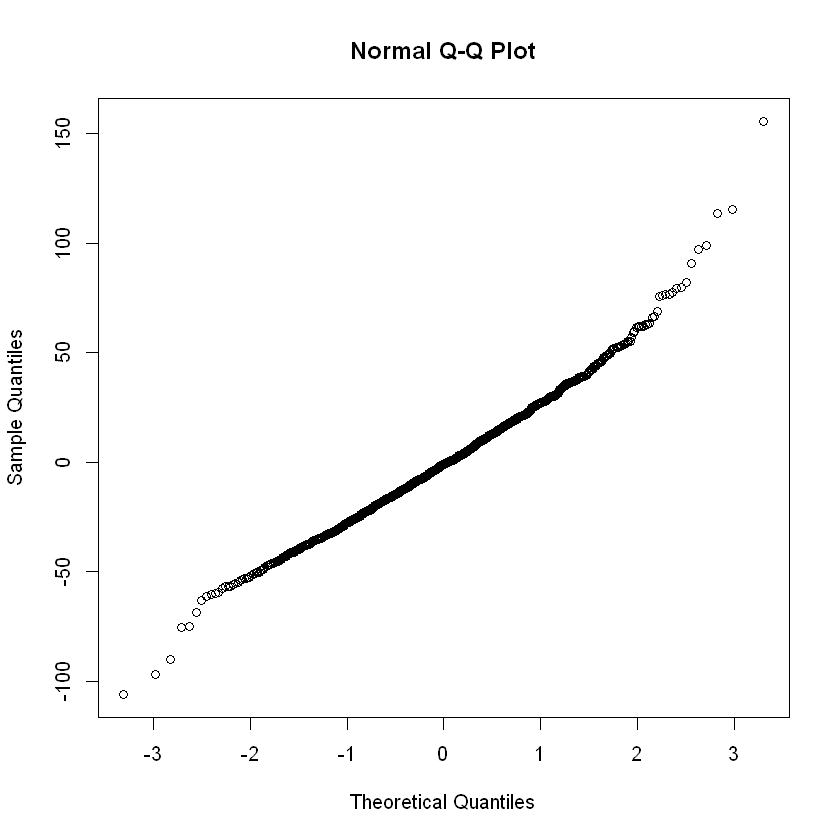

In [53]:
qqnorm(residuals(regmult))

 - the tails of the distribution deviate from normality, but overall this hypothesis does not pose a problem

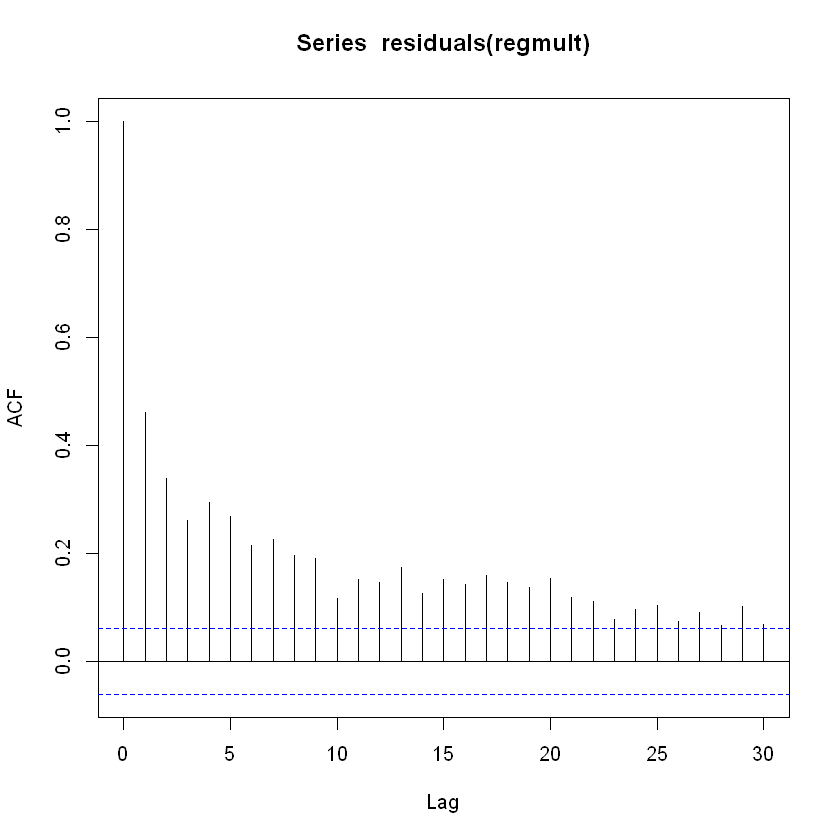

In [55]:
acf(residuals(regmult))

 - strong temporal correlation during one week, less clear afterwards. 
 - an autoregressive model could be more adapted (= tool modelling this temporal dependence)

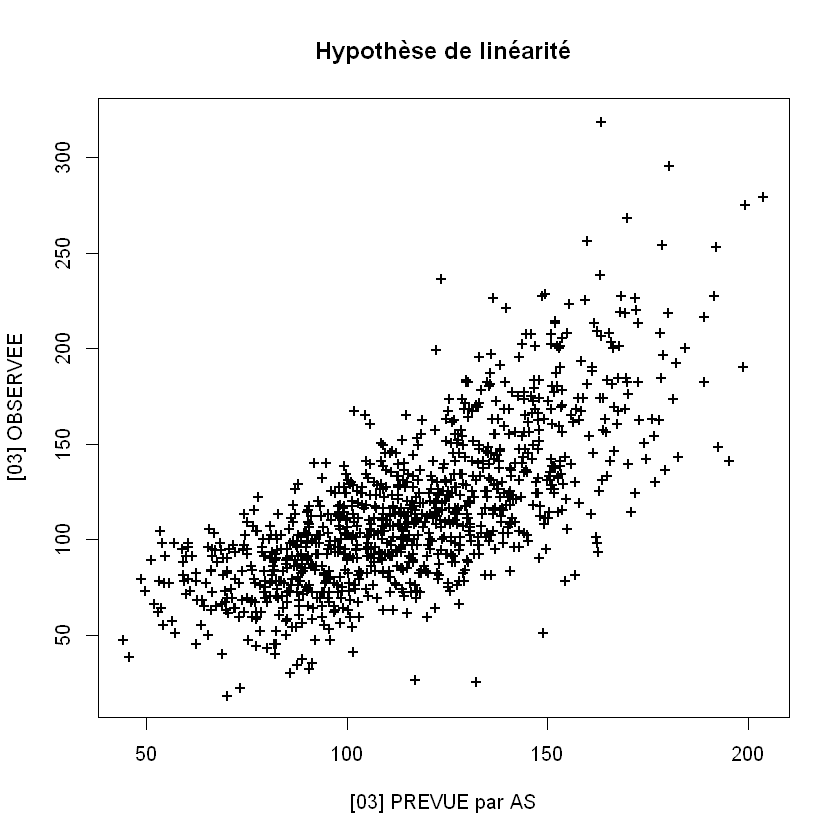

In [57]:
plot(fitted(regmult),data$O3o,xlab="[03] PREVUE par AS",ylab="[03] OBSERVEE",pch="+",main="Hypothèse de linéarité")

 - The hypothesis of linearity of the O3o expectation is correct even if we detect a slight curvature
 - In the end, the predictors to keep here would be O3p, TEMPE, RMH2O and FF.

## Analysis of variance (ANOVA): qualitative predictors

In [58]:
anova1=lm(O3o~JJ,data)
summary(anova1)
model.matrix(anova1)[1:10,]


Call:
lm(formula = O3o ~ JJ, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-96.544 -28.073  -6.544  19.927 203.456 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 115.0726     2.3038  49.949   <2e-16 ***
JJS           0.4716     2.7625   0.171    0.864    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 41.02 on 1039 degrees of freedom
Multiple R-squared:  2.805e-05,	Adjusted R-squared:  -0.0009344 
F-statistic: 0.02915 on 1 and 1039 DF,  p-value: 0.8645


(Intercept),JJS
1,0
1,0
1,1
1,1
1,1
1,1
1,1
1,0
1,0
1,1


- By default, R has set the identification constraint alpha(F)=0. The F-modality of the JJ factor is therefore taken as a reference.
- The constant term of the model therefore includes the effect of the F-modality. The estimate of the alpha(S) parameter relating to the S-modality of the JJ factor
- (here R finds 0.4716 but with a standard deviation of 2.76) is then interpreted as the average impact on O3o of an open day compared to that of an iron day. 
- This term is considered insignificant by the authors.
- This term is found to be insignificant by the Student's t test and therefore the predictor JJ does not seem to be relevant here.


In [61]:
fitted(anova1)[1:10]
fitted(anova2)[1:10]

1        2        3        4        5        6        7        8 
115.0726 115.0726 115.5442 115.5442 115.5442 115.5442 115.5442 115.0726 
       9       10 
115.0726 115.5442

ERROR: Error in fitted(anova2): objet 'anova2' introuvable


## Analysis of covariance (ANCOVA): quantitative and qualitative predictors, automatic selection


In [62]:
regcomplet=lm(O3o~O3p+TEMPE+RMH2O+log(NO2)+FF+STATION+JJ,data)

- The STATION factor is added to 5 modalities. The aim here is to develop a single statistical model for all the stations.

In [63]:
summary(regcomplet)


Call:
lm(formula = O3o ~ O3p + TEMPE + RMH2O + log(NO2) + FF + STATION + 
    JJ, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-101.114  -18.621   -1.137   17.612  151.938 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -22.39777    6.48854  -3.452 0.000579 ***
O3p           0.28314    0.03519   8.047 2.32e-15 ***
TEMPE         3.94099    0.22484  17.528  < 2e-16 ***
RMH2O       678.24828  256.32759   2.646 0.008269 ** 
log(NO2)      3.15832    1.35508   2.331 0.019960 *  
FF           -1.36322    0.36249  -3.761 0.000179 ***
STATIONAls    1.74032    3.38374   0.514 0.607140    
STATIONCad    9.14316    3.12442   2.926 0.003505 ** 
STATIONPla   20.89448    3.86937   5.400 8.27e-08 ***
STATIONRam    2.38132    3.11433   0.765 0.444665    
JJS          -1.02459    1.91137  -0.536 0.592038    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 28.23 on 1030 degrees of freedom
Multiple R-

- Two constraints have been imposed here since there are 2 factors. In view of the R outputs, the software has taken as references the F mode of JJ 
- and the Aix modality of STATION. The constant term (intercept) therefore includes the average effects of the F and Aix modalities.
- If we are interested in the Rambouillet station on an open day, the model will add the terms 2.381 and -1.024.
- The analysis of Student's t tests confirms that the JJ factor is not significantly influential, but some of the STATION modalities are.
- O3o behaves differently at the Pla and Cad stations compared to Aix, while Als and Ram have average behaviours very close to Aix. 
- The STATION predictor should therefore be retained as it enriches the model.
- We notice that the variable FF seems to be more influential than in question 2, as well as for NO2. FF and NO2 have therefore a significant impact on O3o on some stations.



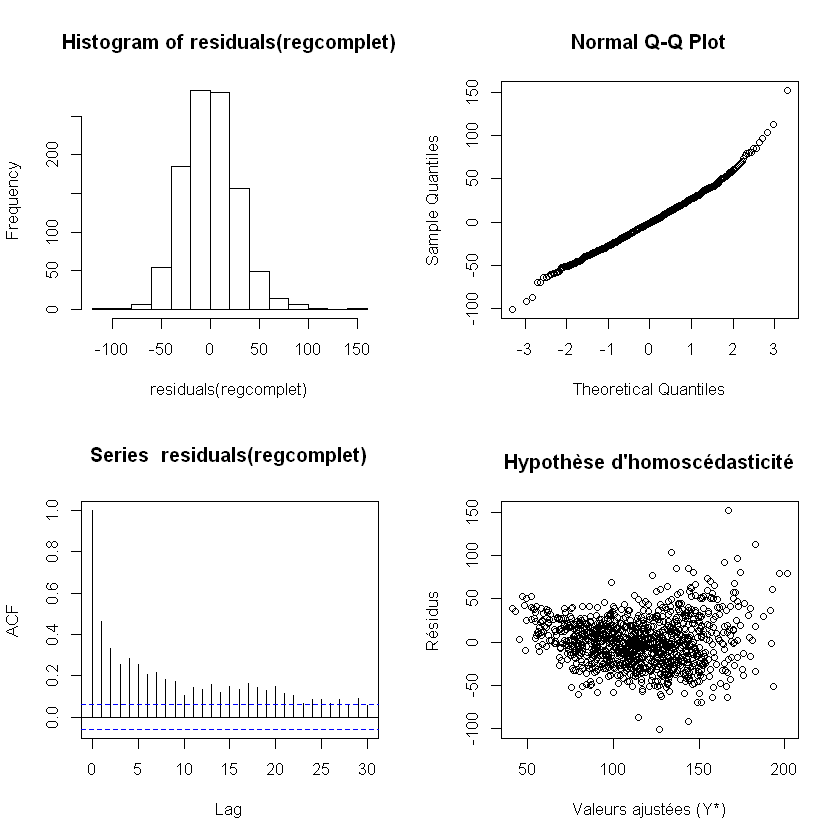

In [64]:
par(mfrow=c(2,2))
hist(residuals(regcomplet))
qqnorm(residuals(regcomplet))
acf(residuals(regcomplet))
plot(fitted(regcomplet),residuals(regcomplet),main="Hypothèse d'homoscédasticité",xlab="Valeurs ajustées (Y*)",ylab="Résidus")


- the independence and homoscedasticity assumptions are not met -> other types of statistical models may be more appropriate for the data

--> # Selection automatique des predicteurs

In [66]:
library(MASS)

In [67]:
regaic=stepAIC(regcomplet)
summary(regaic)
formula(regaic)

Start:  AIC=6965.42
O3o ~ O3p + TEMPE + RMH2O + log(NO2) + FF + STATION + JJ

           Df Sum of Sq     RSS    AIC
- JJ        1       229  820912 6963.7
<none>                   820683 6965.4
- log(NO2)  1      4328  825011 6968.9
- RMH2O     1      5579  826261 6970.5
- FF        1     11269  831952 6977.6
- STATION   4     26698  847381 6990.7
- O3p       1     51594  872277 7026.9
- TEMPE     1    244797 1065480 7235.2

Step:  AIC=6963.71
O3o ~ O3p + TEMPE + RMH2O + log(NO2) + FF + STATION

           Df Sum of Sq     RSS    AIC
<none>                   820912 6963.7
- log(NO2)  1      4253  825165 6967.1
- RMH2O     1      5452  826364 6968.6
- FF        1     11544  832456 6976.3
- STATION   4     26775  847687 6989.1
- O3p       1     51437  872349 7025.0
- TEMPE     1    245508 1066420 7234.1



Call:
lm(formula = O3o ~ O3p + TEMPE + RMH2O + log(NO2) + FF + STATION, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-100.339  -18.341   -1.101   17.653  151.653 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -22.90792    6.41615  -3.570 0.000373 ***
O3p           0.28259    0.03516   8.037  2.5e-15 ***
TEMPE         3.94477    0.22465  17.560  < 2e-16 ***
RMH2O       668.99899  255.65779   2.617 0.009006 ** 
log(NO2)      3.12787    1.35342   2.311 0.021025 *  
FF           -1.37654    0.36152  -3.808 0.000149 ***
STATIONAls    1.68167    3.38080   0.497 0.619001    
STATIONCad    9.11676    3.12296   2.919 0.003585 ** 
STATIONPla   20.90191    3.86800   5.404  8.1e-08 ***
STATIONRam    2.34660    3.11258   0.754 0.451076    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 28.22 on 1031 degrees of freedom
Multiple R-squared:  0.5304,	Adjusted R-squared:  0.5263 
F-statistic:

O3o ~ O3p + TEMPE + RMH2O + log(NO2) + FF + STATION

- automatic top-down selection using the AIC criterion removes only the JJ factor

In [68]:
regbic=stepAIC(regcomplet,k=log(nrow(data)))
summary(regbic)
formula(regbic)

Start:  AIC=7019.85
O3o ~ O3p + TEMPE + RMH2O + log(NO2) + FF + STATION + JJ

           Df Sum of Sq     RSS    AIC
- JJ        1       229  820912 7013.2
- log(NO2)  1      4328  825011 7018.4
<none>                   820683 7019.9
- RMH2O     1      5579  826261 7020.0
- STATION   4     26698  847381 7025.4
- FF        1     11269  831952 7027.1
- O3p       1     51594  872277 7076.4
- TEMPE     1    244797 1065480 7284.6

Step:  AIC=7013.19
O3o ~ O3p + TEMPE + RMH2O + log(NO2) + FF + STATION

           Df Sum of Sq     RSS    AIC
- log(NO2)  1      4253  825165 7011.6
- RMH2O     1      5452  826364 7013.1
<none>                   820912 7013.2
- STATION   4     26775  847687 7018.8
- FF        1     11544  832456 7020.8
- O3p       1     51437  872349 7069.5
- TEMPE     1    245508 1066420 7278.6

Step:  AIC=7011.62
O3o ~ O3p + TEMPE + RMH2O + FF + STATION

          Df Sum of Sq     RSS    AIC
- RMH2O    1      4914  830079 7010.9
<none>                  825165 7011.6
- STATION 


Call:
lm(formula = O3o ~ O3p + TEMPE + FF + STATION, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.526 -18.606  -0.858  17.840 153.262 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -15.82795    6.09487  -2.597  0.00954 ** 
O3p           0.32534    0.03183  10.220  < 2e-16 ***
TEMPE         3.96241    0.21846  18.138  < 2e-16 ***
FF           -1.59270    0.35569  -4.478 8.38e-06 ***
STATIONAls   -0.31788    3.18811  -0.100  0.92060    
STATIONCad    5.89587    2.83971   2.076  0.03812 *  
STATIONPla   16.48771    3.18833   5.171 2.79e-07 ***
STATIONRam    1.19463    3.06210   0.390  0.69652    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 28.35 on 1033 degrees of freedom
Multiple R-squared:  0.5252,	Adjusted R-squared:  0.522 
F-statistic: 163.2 on 7 and 1033 DF,  p-value: < 2.2e-16


O3o ~ O3p + TEMPE + FF + STATION

- automatic top-down selection using the BIC criterion removes the JJ factor and the RMH2O and NO2 variables
- the BIC selection is more severe and leads in general to more parsimonious models (less selected predictors than with the AIC criterion)
- the penalty term associated with the model dimension in the BIC is indeed more important than for the AIC.
- The % of explained variance increases to 52%.



In [71]:
#comparison

#regint=lm(O3o~.*.,data)
#regbicint=stepAIC(regint,k=log(nrow(data)))
#formula(regbicint)

 ## Evaluation of the model developed with the BIC criterion 

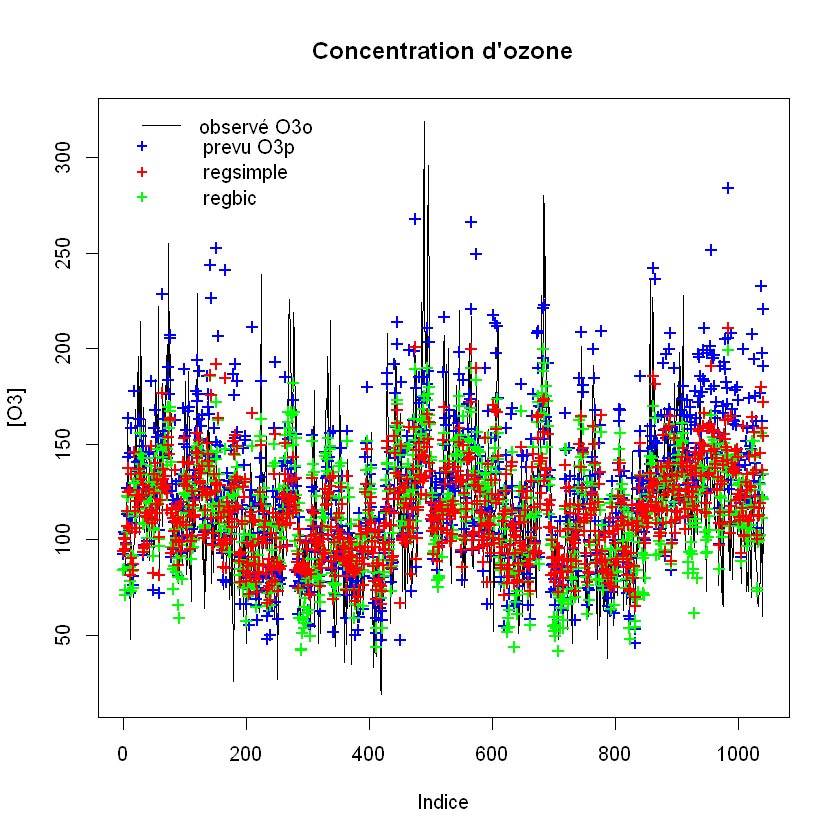

In [72]:
plot(data$O3o,type ="l",main="Concentration d'ozone",xlab="Indice",ylab="[O3]")
points(data$O3p,col="blue",pch="+",cex=1.2)
regsimple=lm(O3o~O3p,data)
points(fitted(regbic),col="green",pch="+",cex=1.2)
points(fitted(regsimple),col="red",pch="+",cex=1.2)
legend(0,330,lty=1,col=c("black"),legend=c("observé O3o"),bty="n")
legend(0,320,pch="+",col=c("blue","red","green"),legend=c("       prevu O3p","       regsimple","       regbic"),bty="n") 


- We see that the more flexible regbic model in green improves on the simple regression in red by giving greater variability to the statistical forecasts


#### Calcul des scores :

In [74]:
# fonction calculant le biais et le RMSE
score=function(obs,prev) {
rmse=sqrt(mean((prev-obs)**2))
biais=mean(prev-obs)
print("Biais       RMSE") 
return(c(biais,rmse))
}

In [75]:
score(data$O3o,data$O3p)

[1] "Biais       RMSE"


[1] 11.81912 38.34460

In [76]:
# -> the gross forecast is biased

In [77]:
score(data$O3o,fitted(regsimple))

[1] "Biais       RMSE"


[1] 3.312472e-16 3.301131e+01

In [78]:
# -> simple regression debiases the raw forecast and reduces the variability of the error

In [79]:
score(data$O3o,fitted(regbic))

[1] "Biais       RMSE"


[1] 6.138855e-16 2.823803e+01

In [80]:
# -> BIC regression further reduces the variability of the error

#### But are the discrepancies significant? There is no way to tell at this stage.


##### Important notes :

- These scores were calculated on the training file, i.e. on the data used to estimate the statistical model.
- To validate the model, it should also be tested on a test file, i.e. on new data (not used to estimate the parameters of the model). 
- The scores on the test file are used to evaluate the quality of the data. The scores on the test file are used to assess the robustness of the 
- of the statistical model (= ability to adapt to new data).
- If the model is too large, the scores will be good or even excellent on learning but bad on testing: the model will be too adapted to the sample of data. 
- If the model is too large, the scores will be good or even excellent on learning but bad on testing: the model will be too adapted to the learning sample but unable to detach itself from it (= phenomenon of over-learning, see slide 29 of the course). 
- The principle of parsimony is therefore very important, it is a guarantee of robustness: for similar performances, keep the lowest dimensional model.

- To have access to the variability of the score estimators (= sensitivity of the estimator to sampling)
- We can practice cross-validation by randomly drawing several training and test sub-samples, allowing us to obtain several estimates of scores for each model.
- score estimates for each model (see graph score.pdf on moodle, scores on training file then test file, the model with interactions is over-learned, 
- the simple and BIC models are robust, the BIC being significantly better on test is therefore the model to retain here).




